# **Aula 5 - Técnicas de Otimização**

## **5.1 Ferramentas**

Uma tarefa importante em modelagens de machine learning é a escolha do melhor modelo através da otimização dos seus hiperparâmetros. Isso também é conhecido como *tuning*. Procedimentos de *tuning* podem ser feitos para estimadores individuais, como em uma árvore de decisão, ou para *pipelines* inteiros que podem incluir vários algoritmos.

<font size=2>**Fonte:** [ML Tuning](https://spark.apache.org/docs/latest/ml-tuning.html)</font>

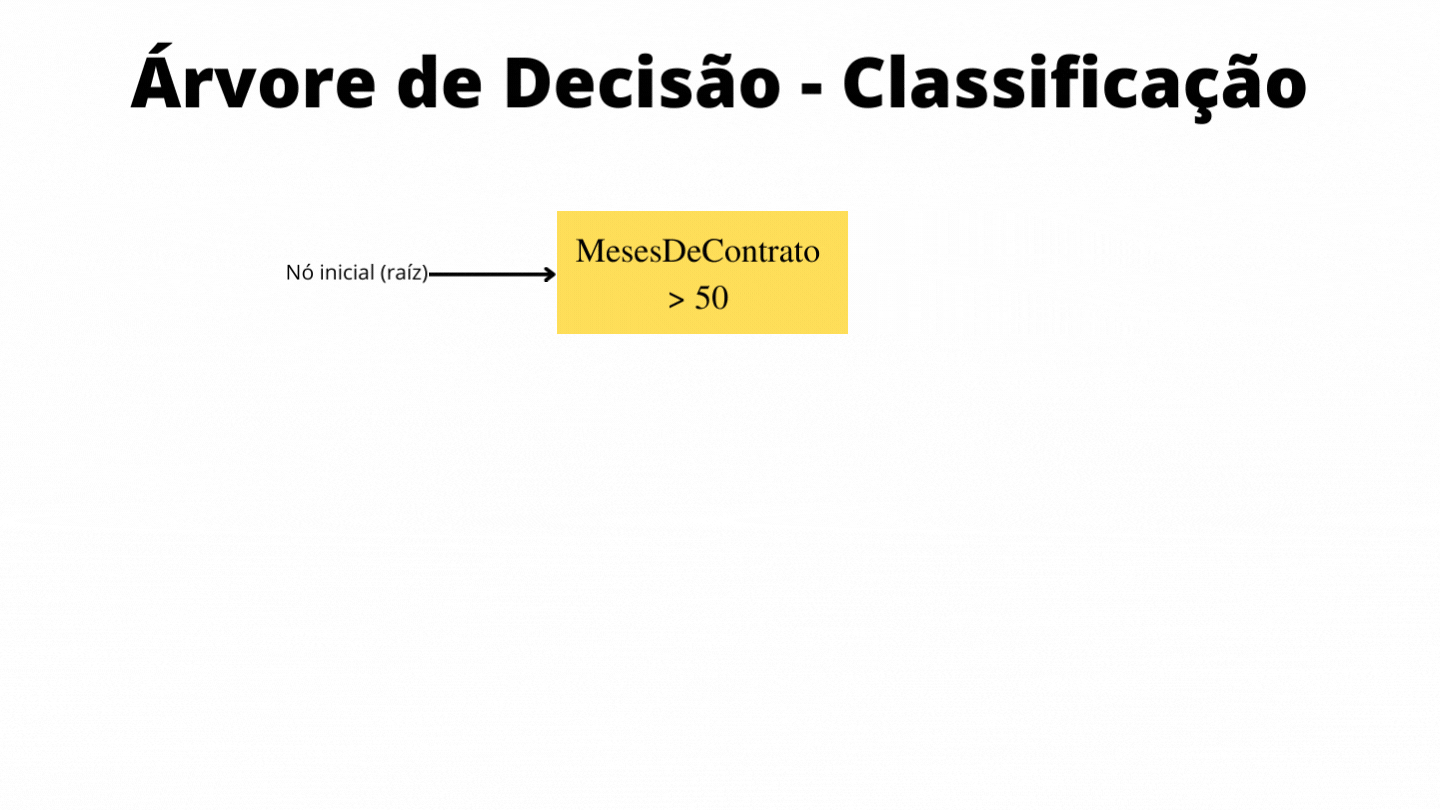

## **5.2 Árvore de Decisão com Cross Validation**

<font size=2>**Documentação:**</font>
<font size=2>[CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html)</font> |
<font size=2>[ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html)</font>

In [70]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [71]:
dtc = DecisionTreeClassifier(seed=SEED)

In [72]:
grid = ParamGridBuilder()\
        .addGrid(dtc.maxDepth, [2, 5, 10])\
        .addGrid(dtc.maxBins, [10, 32, 45])\
        .build()

In [73]:
evaluator = MulticlassClassificationEvaluator()

In [74]:
dtc_cv = CrossValidator(
    estimator=dtc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [75]:
modelo_dtc_cv = dtc_cv.fit(treino)

In [76]:
previsoes_dtc_cv_teste = modelo_dtc_cv.transform(teste)

In [77]:
print('Decision Tree Classifier - Tuning')
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_dtc_cv_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_cv_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Decision Tree Classifier - Tuning
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1327         236
Real
     Não-Churn    423         1156
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.790261
Precisão: 0.758286
Recall: 0.849008
F1: 0.801087


## **5.3 Random Forest com Cross Validation**


In [98]:
rfc = RandomForestClassifier(seed=SEED)

In [99]:
grid = ParamGridBuilder()\
        .addGrid(rfc.maxDepth, [2, 5, 10])\
        .addGrid(rfc.maxBins, [10, 32, 45])\
        .addGrid(rfc.numTrees, [10, 20, 50])\
        .build()

In [100]:
evaluator = MulticlassClassificationEvaluator()

In [101]:
rfc_cv = CrossValidator(
    estimator=rfc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [102]:
modelo_rfc_cv = rfc_cv.fit(treino)

In [103]:
previsoes_rfc_cv_teste = modelo_rfc_cv.transform(teste)

In [104]:
print('Random Forest Classifier - Tuning')
print("="*40)
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
calcula_mostra_matriz_confusao(previsoes_rfc_cv_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_rfc_cv_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Random Forest Classifier - Tuning
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1322         241
Real
     Não-Churn    347         1232
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.812858
Precisão: 0.792091
Recall: 0.845809
F1: 0.818069


In [105]:
melhor_modelo_rfc_cv = modelo_rfc_cv.bestModel

In [106]:
print(melhor_modelo_rfc_cv.getMaxDepth())
print(melhor_modelo_rfc_cv.getMaxBins())
print(melhor_modelo_rfc_cv.getNumTrees)

10
45
20


In [107]:
rfc_tunning = RandomForestClassifier(maxDepth=10, maxBins=45, numTrees=10, seed=SEED)

In [108]:
modelo_rfc_tunning = rfc_tunning.fit(dataset_prep)

In [109]:
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [110]:
novo_cliente = [{
    'Mais65anos': 0,
    'MesesDeContrato': 1,
    'MesesCobrados': 45.30540797610398,
    'Conjuge': 0,
    'Dependentes': 0,
    'TelefoneFixo': 0,
    'MaisDeUmaLinhaTelefonica': 0,
    'SegurancaOnline': 0,
    'BackupOnline': 0,
    'SeguroDispositivo': 0,
    'SuporteTecnico': 0,
    'TVaCabo': 1,
    'StreamingFilmes': 1,
    'ContaCorreio': 1,
    'Internet_DSL': 1,
    'Internet_FibraOptica': 0,
    'Internet_Nao': 0,
    'TipoContrato_Mensalmente': 1,
    'TipoContrato_UmAno': 0,
    'TipoContrato_DoisAnos': 0,
    'MetodoPagamento_DebitoEmConta': 0,
    'MetodoPagamento_CartaoCredito': 0,
    'MetodoPagamento_BoletoEletronico': 1,
    'MetodoPagamento_Boleto': 0
}]

In [111]:
novo_cliente = spark.createDataFrame(novo_cliente)
novo_cliente.show()

+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+-----------------+---------------+----------------------+--------------------------------+-----------------------------+-----------------------------+---------------+-----------------+---------------+--------------+-------+------------+---------------------+------------------------+------------------+
|BackupOnline|Conjuge|ContaCorreio|Dependentes|Internet_DSL|Internet_FibraOptica|Internet_Nao|Mais65anos|MaisDeUmaLinhaTelefonica|    MesesCobrados|MesesDeContrato|MetodoPagamento_Boleto|MetodoPagamento_BoletoEletronico|MetodoPagamento_CartaoCredito|MetodoPagamento_DebitoEmConta|SegurancaOnline|SeguroDispositivo|StreamingFilmes|SuporteTecnico|TVaCabo|TelefoneFixo|TipoContrato_DoisAnos|TipoContrato_Mensalmente|TipoContrato_UmAno|
+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+----

In [112]:
assembler = VectorAssembler(inputCols = X, outputCol = 'features')

In [113]:
novo_cliente_prep = assembler.transform(novo_cliente).select('features')

In [114]:
novo_cliente_prep.show(truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])|
+----------------------------------------------------------------------------+



In [115]:
modelo_rfc_tunning.transform(novo_cliente_prep).show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(24,[1,2,11,12,13...|[1.24640781461703...|[0.12464078146170...|       1.0|
+--------------------+--------------------+--------------------+----------+

